In [1]:
import pandas as pd
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("result (1).csv")
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,qualifiers/11/value,qualifiers/12/type/value,qualifiers/12/type/displayName,blockedX,blockedY,qualifiers/12/value,qualifiers/13/type/value,qualifiers/13/type/displayName,qualifiers/13/value,isGoal
0,2268212395,2,0,0,63,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2268212391,2,0,0,15,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2268212411,3,0,1,15,49.8,50.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2268212669,13,0,2,15,38.2,62.1,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2268212425,4,0,3,15,37.4,52.4,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,2268280415,786,95,43,63,72.4,86.8,97,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1717,2268280419,1086,95,44,15,30.8,5.9,97,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1718,2268280421,787,95,44,63,69.2,94.1,97,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1719,2268280505,1087,96,12,15,37.8,4.1,98,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df[df['type/displayName'] == 'Pass'][['x' , 'y' , 'teamId']]

,x,y,teamId
2,49.8,50.0,15
3,38.2,62.1,15
4,37.4,52.4,15
5,39.1,62.0,15
6,43.9,91.7,15
...,...,...,...
1709,53.6,46.3,63
1710,18.1,0.0,15
1713,65.4,90.3,63
1716,72.4,86.8,63


In [4]:
teams = pd.read_csv("squads.csv")
teams

,22221,24444,25931,34749,76662,77564,80764,84008,91430,91978,...,344156,350088,354406,361330,362431,372469,377309,381255,391977,395818
0,Luis Suárez,Olivier Giroud,César Azpilicueta,Willy Caballero,Jan Oblak,Stefan Savic,Koke,Marcos Alonso,Vitolo,Geoffrey Kondogbia,...,Mario Hermoso,Callum Hudson-Odoi,Miguel San Román,Reece James,João Félix,Sergio Camello,Ivo Grbic,Billy Gilmour,Ricard Sánchez,Álvaro García


In [5]:
teams = teams.transpose()

In [6]:
teams=teams.reset_index()

In [7]:
teams.rename(columns = {'index' : 'playerId' , 0 : 'name'} , inplace = True)

In [8]:
teams.head()

,playerId,name
0,22221,Luis Suárez
1,24444,Olivier Giroud
2,25931,César Azpilicueta
3,34749,Willy Caballero
4,76662,Jan Oblak


In [9]:
df['playerId'].fillna(0 , inplace = True)
df['playerId'] = df['playerId'].astype(int)

In [10]:
teams['playerId'] = teams['playerId'].astype(int)

In [11]:
df = df.merge(teams , on = 'playerId')

In [12]:
df[['x' , 'y' , 'name' , 'teamId']]

,x,y,name,teamId
0,49.8,50.0,Timo Werner,15
1,59.6,79.4,Timo Werner,15
2,58.2,89.4,Timo Werner,15
3,72.1,63.1,Timo Werner,15
4,74.5,79.1,Timo Werner,15
...,...,...,...,...
1704,75.4,90.6,Christian Pulisic,15
1705,34.7,47.8,Christian Pulisic,15
1706,27.8,38.0,Christian Pulisic,15
1707,85.0,15.2,Christian Pulisic,15


In [13]:
def give_team(x) :
    if x == 15 :
        return 'Chelsea'
    
    else :
        return 'Atleti'
    

df['team_name'] = df['teamId'].apply(lambda x : give_team(x))

In [14]:
df[df['type/displayName'] == 'SubstitutionOff'][['name' , 'minute']]

,name,minute
57,Timo Werner,86
161,Mateo Kovacic,73
870,João Félix,81
934,Mason Mount,73
1071,Ángel Correa,81
1252,Callum Hudson-Odoi,79
1334,Saúl Ñíguez,81
1467,Mario Hermoso,83
1510,Olivier Giroud,86


In [15]:
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId', 'qualifiers/0/type/value',
       'qualifiers/0/type/displayName', 'qualifiers/0/value',
       'qualifiers/1/type/value', 'qualifiers/1/type/displayName',
       'qualifiers/1/value', 'qualifiers/2/type/value',
       'qualifiers/2/type/displayName', 'qualifiers/2/value',
       'qualifiers/3/type/value', 'qualifiers/3/type/displayName',
       'qualifiers/3/value', 'qualifiers/4/type/value',
       'qualifiers/4/type/displayName', 'qualifiers/4/value',
       'satisfiedEventsTypes/0', 'satisfiedEventsTypes/1',
       'satisfiedEventsTypes/2', 'satisfiedEventsTypes/3',
       'satisfiedEventsTypes/4', 'satisfiedEventsTypes/5',
       'satisfiedEventsTypes/6', 'endX', 'endY', 'qualifiers/5/type/value',
       'qualifiers/5/type/displayName', 'q

In [25]:
## A function that will return average location of players and the dataframe that has passing between pairs

def build_net(df , team) :
    ##Filter the df with only passes completed by the given team
    spain_passes = df[df['team_name'] == team][['x' ,'y' , 'name' , 'minute']]
    team_heat = spain_passes
    
    ##Find 1st substitution

    minute = df[(df['type/displayName'] == 'SubstitutionOff') &(df['team_name'] == team)]['minute'].min()
    ##Consider passes till only 1st sub
    spain_passes = spain_passes[spain_passes['minute']<minute]
    
    
    
    
    
    ##Calculate average player positions based on the pass starting ppoints
    average_positions = spain_passes.groupby('name').mean()
    average_positions = average_positions.reset_index()
    
    
    ## Accept the jersey numbers for the players.
    ##As they are not in the dataframe already
    jerseys = pd.DataFrame(columns = ['name' , 'number'])
    jerseys['name'] = average_positions['name']
    
    for player in range(len(average_positions)) :
        num = int(input(f"Enter jersey number for {average_positions.iloc[player]['name']}"))
        #jerseys['number'] = [21 , 1 , 19 , 22 , 3 , 18 , 8 , 4 , 20 , 5 , 15]
        jerseys.iloc[player]['number'] = num
    
    
    

    average_positions = average_positions.merge(jerseys , on = 'name')
    average_positions['x'] = average_positions['x']*1.2
    average_positions['y'] = average_positions['y']*0.8
    
    return average_positions , team_heat

In [160]:
##Function to draw the network
def draw_network(team1_heat , team2_heat  , team1_avg , team2_avg , team1 , team2) :
    ##Passing Network for the 1st team
    
    pitch = Pitch(figsize=(30,30) , pitch_type='statsbomb'  , orientation='vertical'  , pitch_color = '#22312b'  )
    
    fig = plt.figure(figsize=(40,40))
    ax1 = fig.add_subplot(121)
    pitch.draw(ax=ax1)
    team1_avg.rename(columns = {'x' : 'start_x' , 'y' : 'start_y'}  , inplace = True)
    team2_avg.rename(columns = {'x' : 'start_x' , 'y' : 'start_y'} , inplace = True)
    
     

    pitch.scatter(team1_avg['start_x'] , team1_avg['start_y'] , ax = ax1 , s = 2500 , color = 'white')
    ##Loop through the average position df to plot the average location of each player
    for p in range(len(team1_avg)) :
        pitch.annotate(text = team1_avg.iloc[p]['number'] , xy = (team1_avg.iloc[p]['start_x'] , team1_avg.iloc[p]['start_y']) ,
                      ax=ax1 , c='#132743', va='center', ha='center', size=30, fontweight='bold', fontfamily="Century Gothic")
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    
    ##We'll be plotting only passes between pairs that happened more than twice
    
    sns.kdeplot(y = team1_heat['x']*1.2 , x = team1_heat['y']*0.8 , n_lines = 10 , fill =True , cmap = 'mako' , thresh = 0.55 , alpha = 0.5)
    plt.ylim(0,120)
    plt.xlim(80,0)
    
    ##Describe 
    ax1.set_title(f"{team1} against {team2} | Until First Sub", fontsize=18, color="w", fontfamily="Andale Mono", fontweight='bold', pad=-30)
    
    
    
    
   
    
    
    
    ##Passing network for the 2nd team
    ax2 = fig.add_subplot(122)
    pitch.draw(ax=ax2)

    pitch.scatter(team2_avg['start_x'] , team2_avg['start_y'] , ax = ax2 , s = 1500 , color = 'white')

    for p in range(len(team2_avg)) :
        pitch.annotate(text = team2_avg.iloc[p]['number'] , xy = (team2_avg.iloc[p]['start_x'] , team2_avg.iloc[p]['start_y']) ,
                      ax=ax2 , c='#132743', va='center', ha='center', size=30, fontweight='bold', fontfamily="Century Gothic")

    
    sns.kdeplot(y = team2_heat['x']*1.2 , x = team2_heat['y']*0.8 , n_lines = 10 , fill =True , cmap = 'mako' , thresh = 0.55 , alpha = 0.5)
    
    ax2.set_title(f"{team2} against {team1} | Until First Sub", fontsize=18, color="w", fontfamily="Andale Mono", fontweight='bold', pad=-30)
    
    pitch.annotate("Node Positions = Average position based on the Start Location of Completed Passes \n Data Source - whoscored", (110,50), color='w',
               fontsize=15, ha='center', va='center', ax=ax1, fontweight='bold', fontfamily="Andale Mono")
    
    pitch.annotate("Node Positions = Average position based on the Start Location of Completed Passes \n Data Source - whoscored", (110,50), color='w',
               fontsize=15, ha='center', va='center', ax=ax2, fontweight='bold', fontfamily="Andale Mono")
    
    #pitch.annotate("Data Source - StatsBomb", (10, 78), color='w',
     #          fontsize=15, ha='center', va='center', ax=ax2, fontweight='bold')
    
    
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xticks()
    plt.yticks()
    plt.ylim(0,120)
    plt.xlim(80,0)
    
    
    ##Save the figure
    plt.savefig('Atleti_vs_Chelsea.jpg', dpi = 50, bbox_inches='tight',facecolor='#22312b')

In [18]:
df[(df['type/displayName'] == 'SubstitutionOff') &(df['team_name'] == "Chelsea")]['minute'].min()

73

In [19]:
df['type/displayName'].unique()

array(['Pass', 'BallTouch', 'Foul', 'MissedShots', 'TakeOn',
       'BallRecovery', 'Dispossessed', 'CornerAwarded', 'Challenge',
       'Aerial', 'SavedShot', 'BlockedPass', 'Interception',
       'SubstitutionOff', 'Tackle', 'Card', 'Clearance', 'Save',
       'KeeperPickup', 'Claim', 'Error', 'Goal', 'SubstitutionOn'],
      dtype=object)

In [20]:
spain_passes = df[(df['type/displayName'] == 'Pass') & (df['team_name'] == 'Chelsea')][['x' ,'y' , 'name' , 'minute']]
    
    ##Find 1st substitution

minute = df[(df['type/displayName'] == 'SubstitutionOff') &(df['team_name'] == 'Chelsea')]['minute'].min()
##Consider passes till only 1st sub
spain_passes = spain_passes[spain_passes['minute']<minute]





##Calculate average player positions based on the pass starting ppoints
average_positions = spain_passes.groupby('name').mean()
average_positions = average_positions.reset_index()

In [155]:
chelsea_avg , chelsea_heat = build_net(df , "Chelsea")
Atleti_avg , atleti_heat = build_net(df , "Atleti")

Enter jersey number for Andreas Christensen 4
Enter jersey number for Antonio Rüdiger 2
Enter jersey number for Callum Hudson-Odoi 20
Enter jersey number for César Azpilicueta 28
Enter jersey number for Jorginho 5
Enter jersey number for Marcos Alonso 3
Enter jersey number for Mason Mount 19
Enter jersey number for Mateo Kovacic 17
Enter jersey number for Olivier Giroud 18
Enter jersey number for Timo Werner 11
Enter jersey number for Édouard Mendy 16
Enter jersey number for Felipe 18
Enter jersey number for Jan Oblak 13
Enter jersey number for João Félix 7
Enter jersey number for Koke 6
Enter jersey number for Luis Suárez 9
Enter jersey number for Marcos Llorente 14
Enter jersey number for Mario Hermoso 22
Enter jersey number for Saúl Ñíguez 8
Enter jersey number for Stefan Savic 15
Enter jersey number for Thomas Lemar 11
Enter jersey number for Ángel Correa 10


C:\Conda\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'n_lines'
  cset = contour_func(
C:\Conda\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'n_lines'
  cset = contour_func(


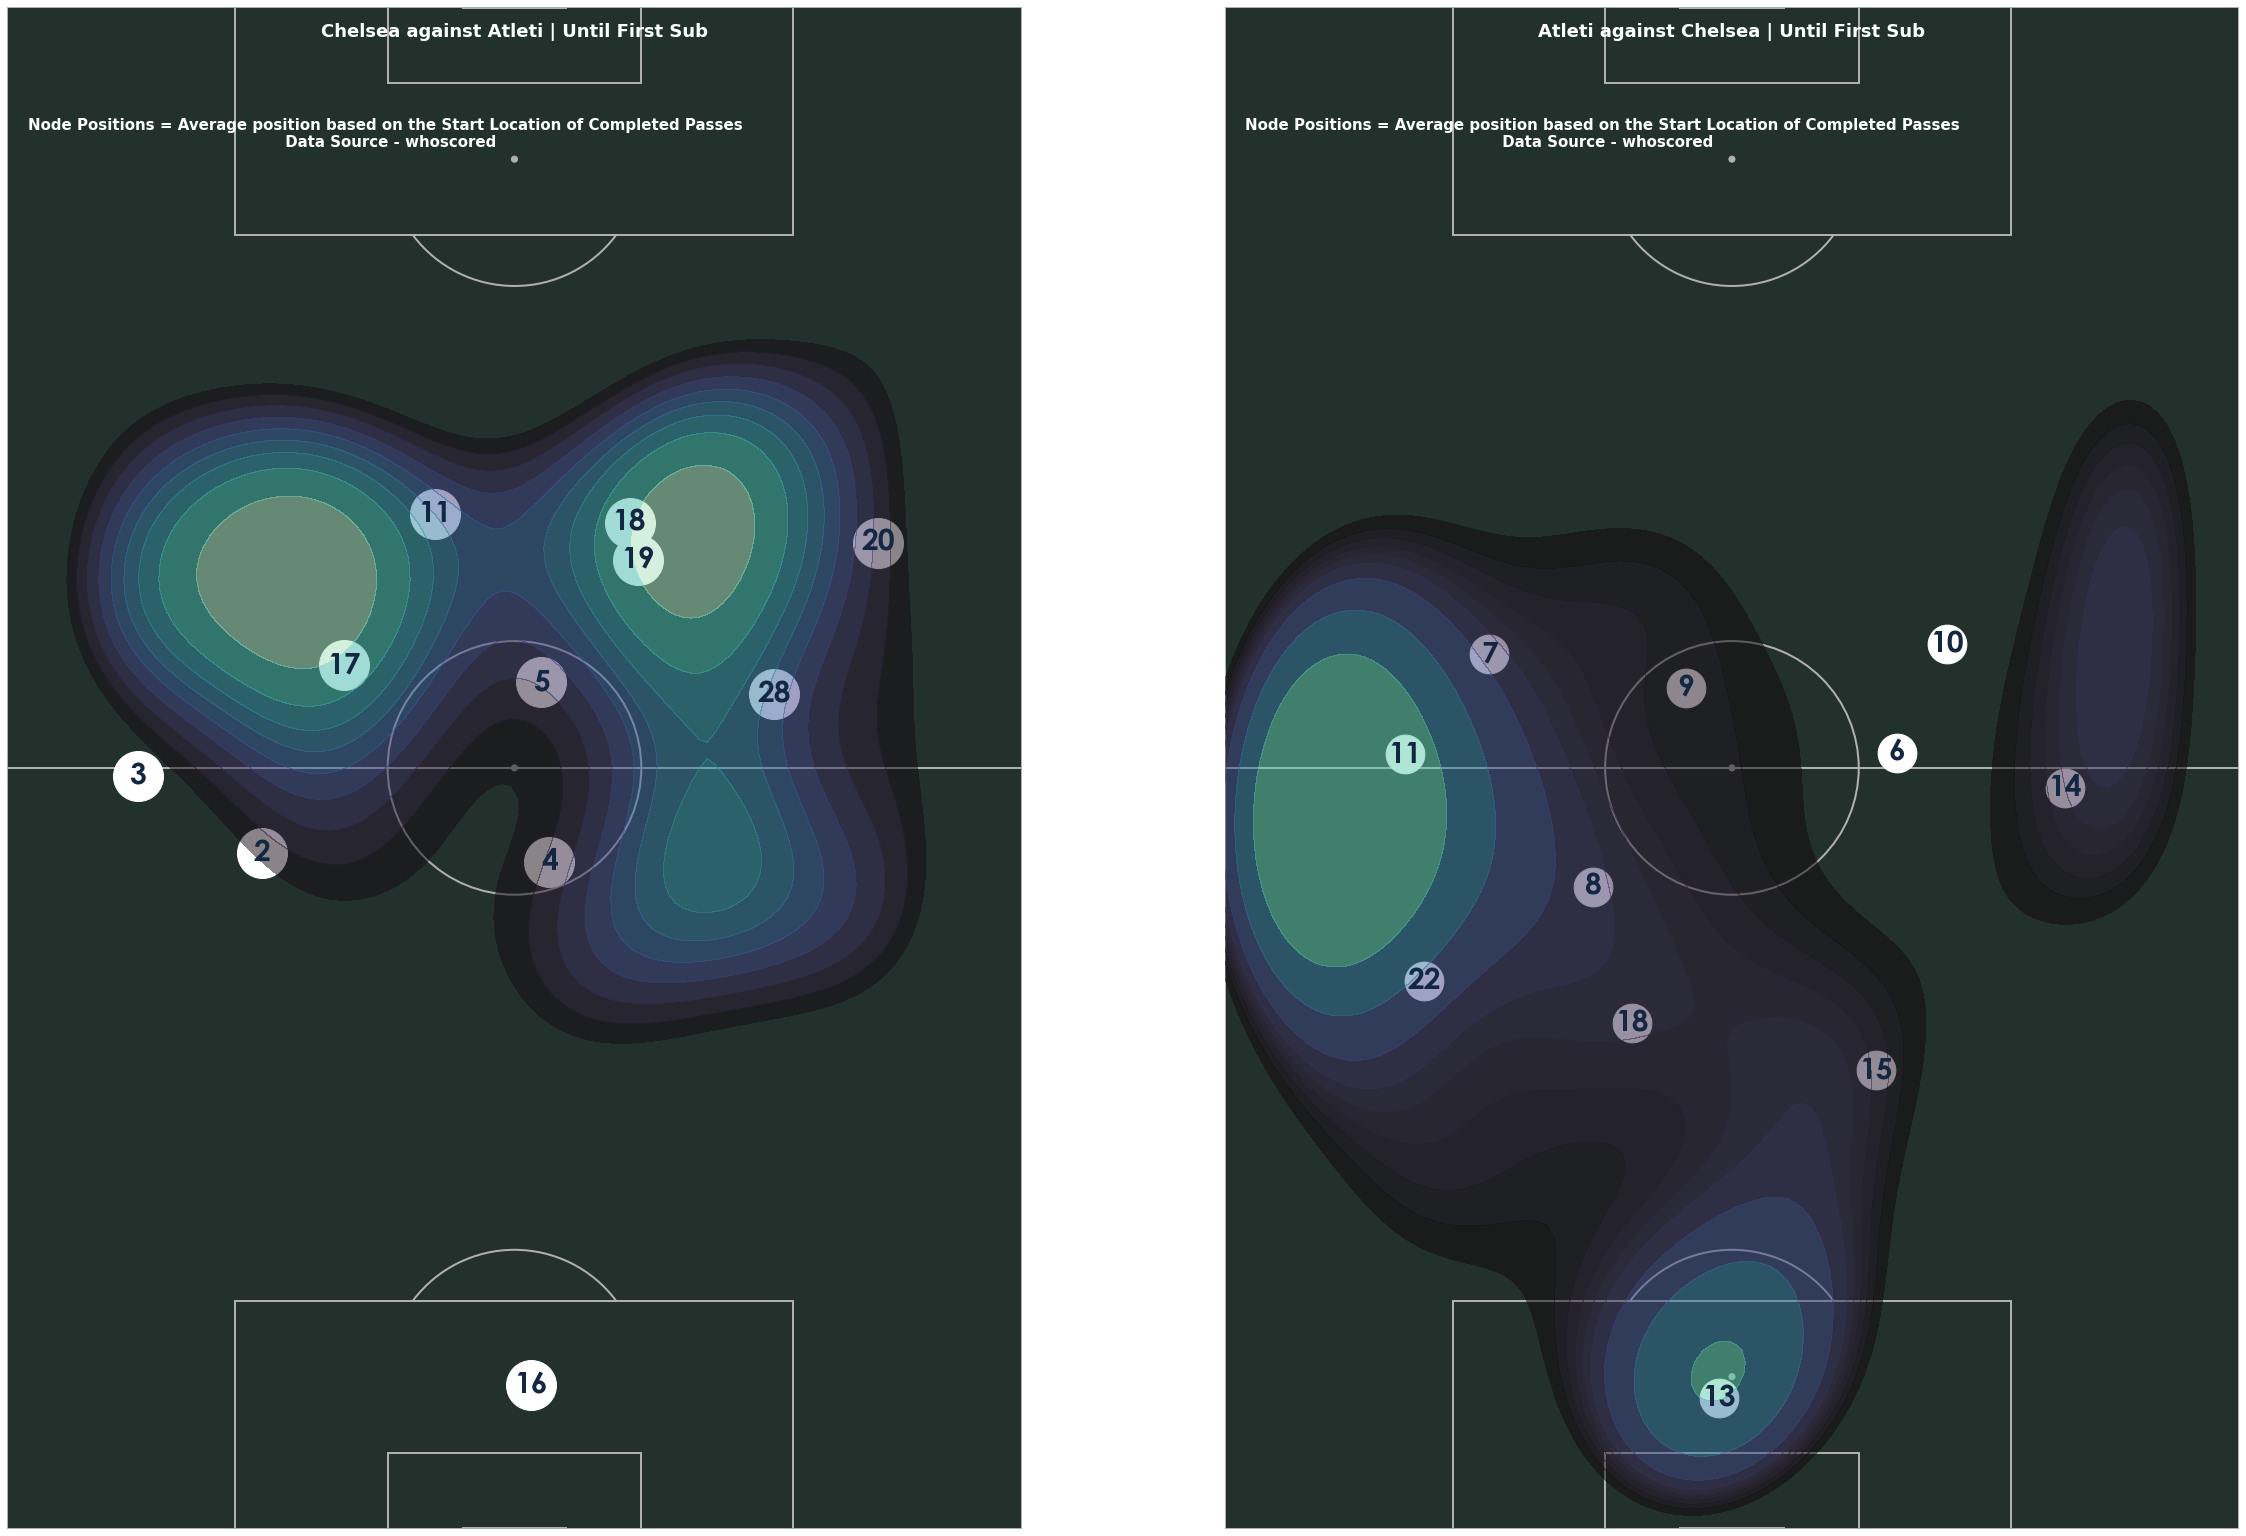

In [161]:
draw_network(team1_heat = chelsea_heat,team2_heat = atleti_heat , team1_avg=chelsea_avg , team2_avg=Atleti_avg , team1='Chelsea' , team2 = 'Atleti')

In [37]:
chelsea_avg.rename(columns = {'x' : 'start_x'} , {'y' : 'start_y'})

SyntaxError: positional argument follows keyword argument (<ipython-input-37-9e44306a06b3>, line 1)

<AxesSubplot:xlabel='start_x', ylabel='start_y'>

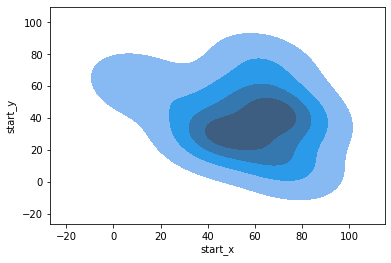

In [57]:
sns.kdeplot(x = Atleti_avg['start_x'] , y = chelsea_avg['start_y'] , levels = 5 , fill = True , palette = 'magma')

In [42]:
chelsea_heat['x'].max()

99.6

In [48]:
df[(df['type/displayName'] == 'Pass') & (df['name'] == 'Koke')]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,qualifiers/12/type/displayName,blockedX,blockedY,qualifiers/12/value,qualifiers/13/type/value,qualifiers/13/type/displayName,qualifiers/13/value,isGoal,name,team_name
751,2268212599,5,0,27,63,32.9,15.1,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
752,2268213027,7,1,25,63,65.9,57.9,1,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
753,2268213103,10,1,33,63,64.2,22.5,1,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
754,2268214151,26,3,22,63,33.7,5.9,3,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
755,2268218353,44,7,19,63,34.6,66.3,7,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
756,2268219175,52,8,3,63,62.9,10.4,8,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
757,2268220165,62,8,52,63,75.0,14.9,8,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
758,2268220945,70,9,31,63,72.6,8.6,9,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
759,2268224087,89,12,16,63,31.9,40.4,12,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
760,2268225673,113,13,42,63,57.5,5.6,13,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Koke,Atleti
